# Exploración de datos estructurados

In [1]:
import psycopg2 as pg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Crear conexión a la base de datos eICU
eicu = pg.connect(user='postgres', password='postgres', host='localhost', dbname='eicu')

# Set schema
cursor = eicu.cursor()
cursor.execute('SET search_path TO aidxmods')
eicu.commit()
cursor.close()

# Obtener datos del primer día
dfeicu = pd.read_sql('select * from firstday', eicu)

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Volumen de datos
rowseicu = len(dfeicu)
colseicu = len(dfeicu.columns)

print(f"Filas:    {rowseicu:>10,}")
print(f"Columnas: {colseicu:>10,}")

Filas:        95,555
Columnas:        148


### Variables numéricas

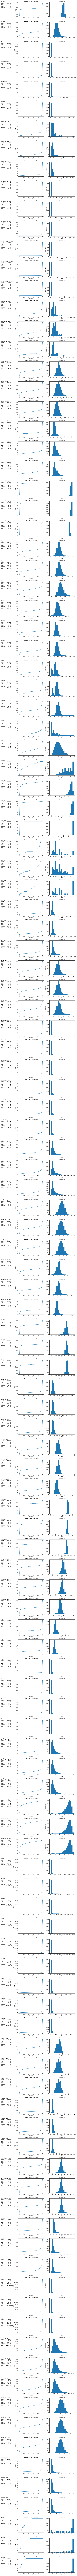

In [59]:
numeric_cols = [
    'height', 'weight', 'bmi', 'los_admission', 'los_preicu', 'los_icu', 
    'dopamine_min', 'dopamine_avg', 'dopamine_max', 'epinephrine_min', 'epinephrine_avg', 'epinephrine_max', 
    'norepinephrine_min', 'norepinephrine_avg', 'norepinephrine_max', 'dobutamine_min', 'dobutamine_avg', 'dobutamine_max', 
    'heartrate_min', 'heartrate_avg', 'heartrate_max', 'resprate_min', 'resprate_avg', 'resprate_max', 
    'temperature_min', 'temperature_avg', 'temperature_max', 'sbp_min', 'sbp_avg', 'sbp_max', 'dbp_min', 'dbp_avg', 'dbp_max', 
    'map_min', 'map_avg', 'map_max', 'cvp_min', 'cvp_avg', 'cvp_max', 'spo2_min', 'spo2_avg', 'spo2_max', 
    'fio2_min', 'fio2_avg', 'fio2_max', 'pao2_min', 'pao2_avg', 'pao2_max', 'paco2_min', 'paco2_avg', 'paco2_max', 
    'bilirubin_min', 'bilirubin_avg', 'bilirubin_max', 'creatinine_min', 'creatinine_avg', 'creatinine_max', 
    'bun_min', 'bun_avg', 'bun_max', 'hematocrit_min', 'hematocrit_avg', 'hematocrit_max', 
    'bicarbonate_min', 'bicarbonate_avg', 'bicarbonate_max', 'ph_min', 'ph_avg', 'ph_max', 
    'platelets_min', 'platelets_avg', 'platelets_max', 'potassium_min', 'potassium_avg', 'potassium_max', 
    'sodium_min', 'sodium_avg', 'sodium_max', 'chloride_min', 'chloride_avg', 'chloride_max', 
    'magnesium_min', 'magnesium_avg', 'magnesium_max', 'wbc_min', 'wbc_avg', 'wbc_max', 
    'lymphocytes_min', 'lymphocytes_avg', 'lymphocytes_max', 'neutrophils_min', 'neutrophils_avg', 'neutrophils_max', 
    'ast_min', 'ast_avg', 'ast_max', 'alt_min', 'alt_avg', 'alt_max', 'alp_min', 'alp_avg', 'alp_max', 
    'albumin_min', 'albumin_avg', 'albumin_max', 'glucose_min', 'glucose_avg', 'glucose_max', 
    'base_excess_min', 'base_excess_avg', 'base_excess_max', 'ptt_min', 'ptt_avg', 'ptt_max', 'bnp_min', 'bnp_avg', 'bnp_max', 
    'fibrinogen_min', 'fibrinogen_avg', 'fibrinogen_max', 'hemoglobin_min', 'hemoglobin_avg', 'hemoglobin_max', 
    'lactate_min', 'lactate_avg', 'lactate_max', 'gcs_min', 'gcs_avg', 'gcs_max',
]

fig, axs = plt.subplots(len(numeric_cols), 2, figsize=(12, 3 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    
    var = dfeicu[col]
    stats = var.describe()

    # Notas
    axs[i, 0].text(-0.70, 1.00, col, fontsize=12, fontfamily='monospace', transform=axs[i, 0].transAxes)
    axs[i, 0].text(-0.70, 0.90, f"count:  {stats['count']:>8,.0f}", fontsize=12, fontfamily='monospace', transform=axs[i, 0].transAxes)
    axs[i, 0].text(-0.70, 0.80, f"min:    {stats['min']:>8,.2f}", fontsize=12, fontfamily='monospace', transform=axs[i, 0].transAxes)
    axs[i, 0].text(-0.70, 0.70, f"mean:   {stats['mean']:>8,.2f}", fontsize=12, fontfamily='monospace', transform=axs[i, 0].transAxes)
    axs[i, 0].text(-0.70, 0.60, f"median: {stats['50%']:>8,.2f}", fontsize=12, fontfamily='monospace', transform=axs[i, 0].transAxes)
    axs[i, 0].text(-0.70, 0.50, f"max:    {stats['max']:>8,.2f}", fontsize=12, fontfamily='monospace', transform=axs[i, 0].transAxes)

    # Distribución de cuantiles
    axs[i, 0].plot(var.quantile([x / 100 for x in range(0, 101)]))
    axs[i, 0].set_title('Distribución de cuantiles')
    axs[i, 0].set_xlabel('Cuantil')
    axs[i, 0].set_ylabel('Valor')

    # Distribución de la selección
    axs[i, 1].hist(var.values, bins=20)
    axs[i, 1].set_title('Histograma')
    axs[i, 1].set_xlabel('Valor')
    axs[i, 1].set_ylabel('Frecuencia')
    
plt.tight_layout()
plt.show()
plt.close()

### Variables binarias

In [ ]:
binary_cols = [
    'gender',
    'surgery',
    'elective_surgery',
    'death_hosp',
    'sirs',
    'cancer',
    'lymphoma',
    'rads',
    'aids',
    'hepatic_failure',
    'heart_failure',
    'respiratory_failure',
    'renal_failure',
    'ventilation',
]

### Variables categóricas

In [ ]:
category_cols = [
    'ethnicity',
    'admission_cause',
]